# Importing libraries

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef,classification_report,roc_curve, auc, mean_squared_error, make_scorer, f1_score
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier, plot_importance 
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# Importing data

In [2]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
       'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
       'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
       'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total','spam']
data = pd.read_csv('spambase.data', names = col_names )

In [3]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Segmenting target and predictor data

In [4]:
X = data.drop(['spam'], axis=1)
Y = data[['spam']]

In [5]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [7]:
Y.head()

,spam
0,1
1,1
2,1
3,1
4,1


# Spliting target and predictor data into training and testing 

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Scaling the data using MinMaxScaler

In [327]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree

In [181]:
clf = DecisionTreeClassifier()
p_grid = {"max_depth": list(range(1,30)), "criterion" : ['entropy','gini'], 'min_samples_leaf' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
Best Score: 0.9231018818948734


## Using the best hyperparameters in building the final model.

In [185]:
classifier_d = DecisionTreeClassifier(criterion = finalparam['criterion'], max_depth = finalparam['max_depth'],
                                      min_samples_leaf = finalparam['min_samples_leaf'])
classifier_d.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy:", accuracy_score(Y_test, classifier_d.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_d, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print('*' * 50)
print( "Mean Accuracy:" "%0.2f (+/- %0.2f)" % (cross_val_score(classifier_d, X_train,
                                                                                   Y_train,cv=10,
                                                                                   scoring = 'accuracy').mean(),
                                       cross_val_score(classifier_d, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_d.predict(X_test)))
print('*' * 50)
print( 'Confusion Matrix\n', confusion_matrix(Y_test, classifier_d.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_d.predict(X_test)))

GOODNESS OF MODEL
Accuracy: 0.9190256747860435
**************************************************
[0.89644013 0.91909385 0.9223301  0.93527508 0.91585761 0.92857143
 0.91233766 0.91530945 0.91856678 0.93811075]
**************************************************
**************************************************
Mean Accuracy:0.92 (+/- 0.02)
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       913
           1       0.92      0.87      0.90       606

    accuracy                           0.92      1519
   macro avg       0.92      0.91      0.91      1519
weighted avg       0.92      0.92      0.92      1519

**************************************************
Confusion Matrix
 [[867  46]
 [ 77 529]]
**************************************************
Matthews Corrcoef 0.8304551246855181


## ROC curve

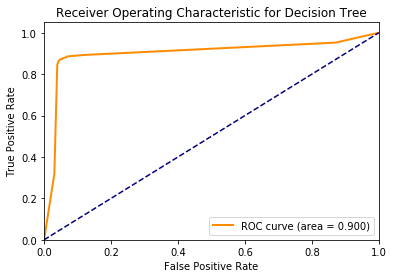

In [186]:
y_score = classifier_d.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Lift curve

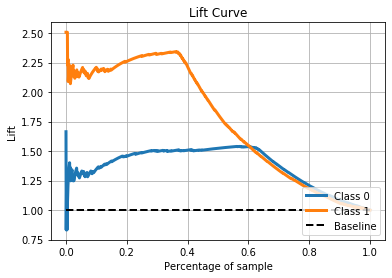

In [187]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [189]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" ,classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[848  65]
 [ 69 537]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       913
           1       0.89      0.89      0.89       606

    accuracy                           0.91      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.91      0.91      0.91      1519

Accuracy: 0.912
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[848  65]
 [ 69 537]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       913
           1       0.89      0.89      0.89       606

    accuracy                           0.91      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.91      0.91      0.91      1519

Accuracy: 0.912
************************************************************
Confus

# KNN

In [190]:
clf = KNeighborsClassifier()
p_grid = {'weights':["uniform", "distance"], 'n_neighbors' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'n_neighbors': 6, 'weights': 'distance'}
Best Score: 0.9104477611940298


## Using the best hyperparameters in building the final model.

In [191]:
classifier_k = KNeighborsClassifier(n_neighbors= finalparam['n_neighbors'], weights= finalparam['weights'])
classifier_k.fit(X_train_scaled, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_k, X_train_scaled, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_k, X_train_scaled,
                                                                                    Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_k, X_train_scaled, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_k.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9032258064516129
**************************************************
[0.89644013 0.92556634 0.90291262 0.91585761 0.88996764 0.90909091
 0.90909091 0.9218241  0.89576547 0.93811075]
**************************************************
Mean Accuracy: 0.91 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       913
           1       0.89      0.86      0.88       606

    accuracy                           0.90      1519
   macro avg       0.90      0.90      0.90      1519
weighted avg       0.90      0.90      0.90      1519

**************************************************
Confusion Matrix
 [[848  65]
 [ 82 524]]
**************************************************
Matthews Corrcoef 0.7974720327941596


## ROC curve

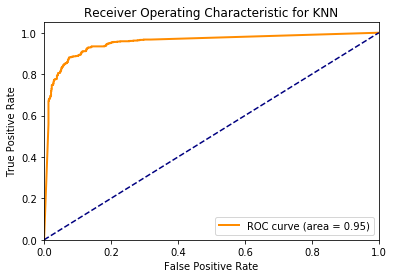

In [192]:
y_score = classifier_k.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

## Lift curve

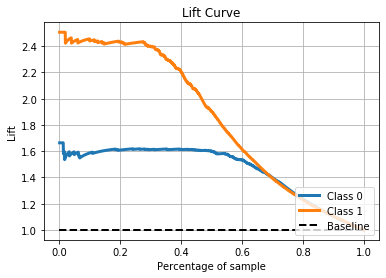

In [193]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [194]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" ,classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[635 278]
 [ 20 586]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.70      0.81       913
           1       0.68      0.97      0.80       606

    accuracy                           0.80      1519
   macro avg       0.82      0.83      0.80      1519
weighted avg       0.85      0.80      0.80      1519

Accuracy: 0.804
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[743 170]
 [ 36 570]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       913
           1       0.77      0.94      0.85       606

    accuracy                           0.86      1519
   macro avg       0.86      0.88      0.86      1519
weighted avg       0.88      0.86      0.87      1519

Accuracy: 0.864
************************************************************
Confus

# Logistic Regression

In [195]:
clf = LogisticRegression()
p_grid = {'penalty':["l1", "l2"], 'C' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'C': 6, 'penalty': 'l1'}
Best Score: 0.9318624269954575


## Using the best hyperparameters in building the final model.

In [196]:
classifier_l = LogisticRegression(C= finalparam['C'], penalty = finalparam['penalty'])
classifier_l.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_l.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_l, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_l,
                                                                                   X_train, Y_train, cv=10,
                                                       scoring='accuracy').mean(),
                                       cross_val_score(classifier_l, X_train, Y_train, cv=10,
                                                       scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_l.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_l.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_l.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9163923633969717
**************************************************
[0.94174757 0.94174757 0.95145631 0.94498382 0.91909385 0.94155844
 0.91883117 0.90228013 0.91205212 0.94136808]
**************************************************
Mean Accuracy: 0.93 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       913
           1       0.90      0.89      0.89       606

    accuracy                           0.92      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.92      0.92      0.92      1519

**************************************************
Confusion Matrix
 [[854  59]
 [ 68 538]]
**************************************************
Matthews Corrcoef 0.8252904960664044


## ROC curve

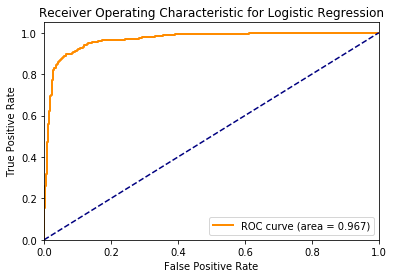

In [197]:
y_score = classifier_l.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Lift curve

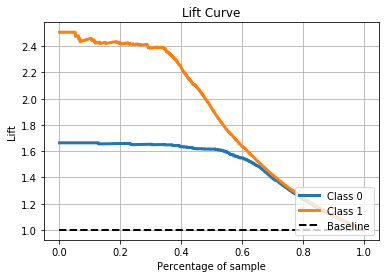

In [198]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [199]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[660 253]
 [ 18 588]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83       913
           1       0.70      0.97      0.81       606

    accuracy                           0.82      1519
   macro avg       0.84      0.85      0.82      1519
weighted avg       0.86      0.82      0.82      1519

Accuracy: 0.822
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[765 148]
 [ 26 580]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       913
           1       0.80      0.96      0.87       606

    accuracy                           0.89      1519
   macro avg       0.88      0.90      0.88      1519
weighted avg       0.90      0.89      0.89      1519

Accuracy: 0.885
************************************************************
Confus

# SVC

In [200]:
clf = SVC(probability = True)
p_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid' ], 'C' : [0.001,0.1,1,10,100],
          'degree': list(range(3,8)), 'gamma': ['auto', 'scale']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Best Score: 0.9328358208955224


## Using the best hyperparameters in building the final model.

In [201]:
classifier_S = SVC(kernel= finalparam['kernel'], C = finalparam['C'], degree = finalparam['degree'],
                   gamma = finalparam['gamma'], probability = True)
classifier_S.fit(X_train_scaled, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_S, X_train_scaled, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_S,
                                                                                   X_train_scaled, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_S, X_train_scaled, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_S.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9203423304805793
**************************************************
[0.95145631 0.95145631 0.9579288  0.94498382 0.90614887 0.94805195
 0.9025974  0.90879479 0.91205212 0.94462541]
**************************************************
Mean Accuracy: 0.93 (+/- 0.04)
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       913
           1       0.90      0.90      0.90       606

    accuracy                           0.92      1519
   macro avg       0.92      0.92      0.92      1519
weighted avg       0.92      0.92      0.92      1519

**************************************************
Confusion Matrix
 [[854  59]
 [ 62 544]]
**************************************************
Matthews Corrcoef 0.8337686759509125


## ROC curve

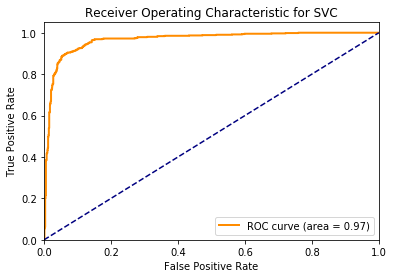

In [202]:
y_score = classifier_S.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVC')
plt.legend(loc="lower right")
plt.show()

## Lift curve

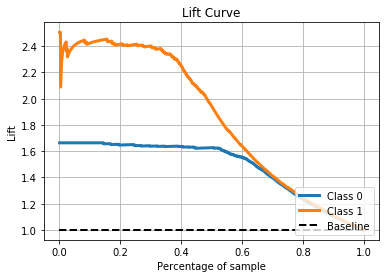

In [203]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [204]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[616 297]
 [ 12 594]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80       913
           1       0.67      0.98      0.79       606

    accuracy                           0.80      1519
   macro avg       0.82      0.83      0.80      1519
weighted avg       0.86      0.80      0.80      1519

Accuracy: 0.797
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[774 139]
 [ 20 586]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       913
           1       0.81      0.97      0.88       606

    accuracy                           0.90      1519
   macro avg       0.89      0.91      0.89      1519
weighted avg       0.91      0.90      0.90      1519

Accuracy: 0.895
************************************************************
Confus

# Naive Bayes

In [205]:
classifier_G = GaussianNB(priors=None, var_smoothing=1e-09)
classifier_G.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_G, X_train, Y_train, cv=10, scoring = 'accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_G,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring = 'accuracy').mean(),
                                       cross_val_score(classifier_G, X_train, Y_train,
                                                       cv=10, scoring = 'accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_G.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.8176431863067808
**************************************************
[0.8381877  0.82200647 0.83171521 0.83171521 0.76699029 0.84415584
 0.83766234 0.80130293 0.83387622 0.80781759]
**************************************************
Mean Accuracy: 0.82 (+/- 0.04)
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       913
           1       0.70      0.95      0.81       606

    accuracy                           0.82      1519
   macro avg       0.83      0.84      0.82      1519
weighted avg       0.85      0.82      0.82      1519

**************************************************
Confusion Matrix
 [[665 248]
 [ 29 577]]
**************************************************
Matthews Corrcoef 0.6689621800100277


## ROC curve

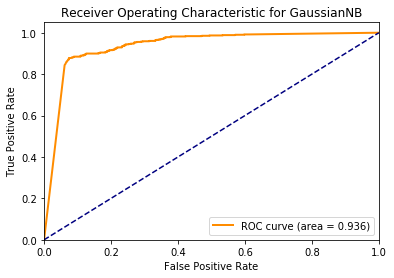

In [206]:
y_score =classifier_G.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GaussianNB')
plt.legend(loc="lower right")
plt.show()

## Lift Curve

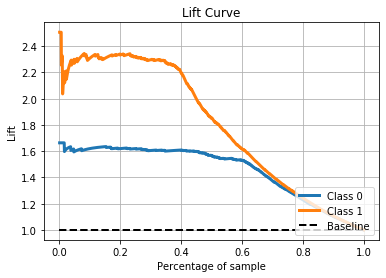

In [207]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [208]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[661 252]
 [ 28 578]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.72      0.83       913
           1       0.70      0.95      0.81       606

    accuracy                           0.82      1519
   macro avg       0.83      0.84      0.82      1519
weighted avg       0.85      0.82      0.82      1519

Accuracy: 0.816
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[662 251]
 [ 28 578]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.73      0.83       913
           1       0.70      0.95      0.81       606

    accuracy                           0.82      1519
   macro avg       0.83      0.84      0.82      1519
weighted avg       0.85      0.82      0.82      1519

Accuracy: 0.816
************************************************************
Confus

# Random Forest 

In [209]:
clf_R = RandomForestClassifier()
p_grid = {"max_depth": [None],
              'n_estimators':list(range(10,100,10)),
              "max_features": ['auto', 'log2', None],
              "min_samples_split": [2,6,10],
              "min_samples_leaf": [1,2,4],
              "bootstrap": [True, False]}
grid = GridSearchCV(estimator = clf_R, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}
Best Score: 0.9529526281635302


## Using the best hyperparameters in building the final model.

In [210]:
classifier_R = RandomForestClassifier(bootstrap = finalparam['bootstrap'], max_depth = finalparam['max_depth'],
                               max_features = finalparam['max_features'],
                               min_samples_leaf = finalparam['min_samples_leaf'],
                               min_samples_split = finalparam['min_samples_split'],
                               n_estimators = finalparam['n_estimators'])
classifier_R.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_R.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_R, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_R,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_R, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_R.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_R.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_R.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9578670177748518
**************************************************
[0.93527508 0.97087379 0.96440129 0.95469256 0.95145631 0.9512987
 0.92207792 0.94136808 0.92508143 0.96091205]
**************************************************
Mean Accuracy: 0.95 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       913
           1       0.96      0.94      0.95       606

    accuracy                           0.96      1519
   macro avg       0.96      0.95      0.96      1519
weighted avg       0.96      0.96      0.96      1519

**************************************************
Confusion Matrix
 [[887  26]
 [ 38 568]]
**************************************************
Matthews Corrcoef 0.9119765340240746


## ROC curve

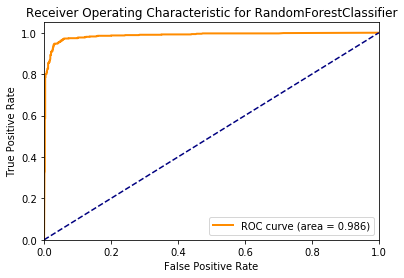

In [211]:
y_score = classifier_R.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

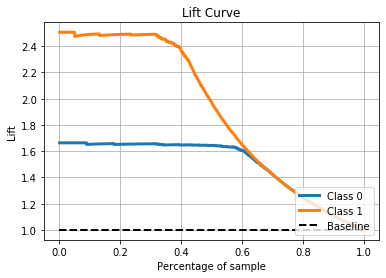

In [212]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [213]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[657 256]
 [  7 599]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       913
           1       0.70      0.99      0.82       606

    accuracy                           0.83      1519
   macro avg       0.85      0.85      0.83      1519
weighted avg       0.87      0.83      0.83      1519

Accuracy: 0.827
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[781 132]
 [ 11 595]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       913
           1       0.82      0.98      0.89       606

    accuracy                           0.91      1519
   macro avg       0.90      0.92      0.90      1519
weighted avg       0.92      0.91      0.91      1519

Accuracy: 0.906
************************************************************
Confus

## Feature Importance

In [214]:
feature_important = []
column_names = []
for idx, col_name in enumerate(X_train.columns):
    print("The importance of feature {} is {}".format(col_name, classifier_R.feature_importances_[idx]))
    feature_important.append(classifier_R.feature_importances_[idx])
    column_names.append(col_name)

The importance of feature word_freq_make is 0.0042329974087390795
The importance of feature word_freq_address is 0.007185749590511407
The importance of feature word_freq_all is 0.01223411258522786
The importance of feature word_freq_3d is 0.0009724931198269073
The importance of feature word_freq_our is 0.04010940453778446
The importance of feature word_freq_over is 0.01067527952581011
The importance of feature word_freq_remove is 0.06115185914024639
The importance of feature word_freq_internet is 0.012643851024522795
The importance of feature word_freq_order is 0.004859696399875541
The importance of feature word_freq_mail is 0.009423596147424499
The importance of feature word_freq_receive is 0.009387899134240435
The importance of feature word_freq_will is 0.00974738592580848
The importance of feature word_freq_people is 0.0031446074580567854
The importance of feature word_freq_report is 0.0018738712540883324
The importance of feature word_freq_addresses is 0.005023564386790362
The impo

## Visualization of the feature importance

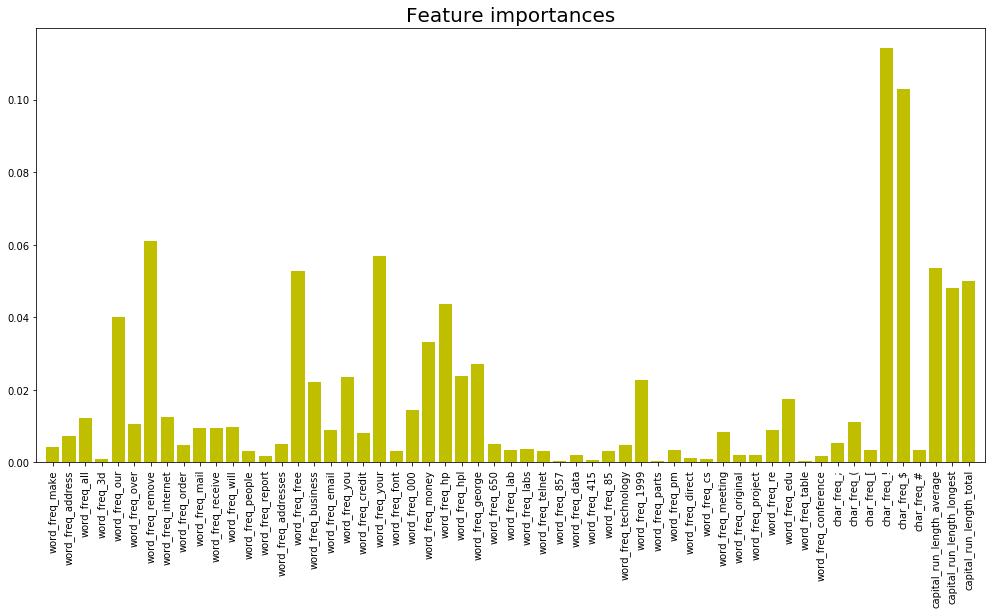

In [215]:
plt.figure(figsize=(17, 8))
plt.title("Feature importances",size=20)
plt.bar(range(X.shape[1]), feature_important,
       color='y' , align="center")
plt.xticks(range(X.shape[1]), column_names,rotation=90,fontsize = 10)
plt.xlim([-1, X.shape[1]])
plt.show()

# Ada Boosting

In [216]:
clf = AdaBoostClassifier()
p_grid = { 'n_estimators': list(range(10,110,10)), 'learning_rate' : [0.01,0.05,0.1,0.3,1],
          'algorithm' : ['SAMME', 'SAMME.R']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 90}
Best Score: 0.9474367293964958


## Using the best hyperparameters in building the final model.

In [217]:
classifier_A = AdaBoostClassifier(n_estimators = finalparam['n_estimators'], algorithm = finalparam['algorithm'],
                              learning_rate = finalparam['learning_rate'])
classifier_A.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_A.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_A, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_A,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_A, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_A.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_A.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_A.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9374588545095458
**************************************************
[0.93203883 0.96116505 0.96116505 0.94822006 0.96440129 0.96103896
 0.91883117 0.93159609 0.93485342 0.96091205]
**************************************************
Mean Accuracy: 0.95 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       913
           1       0.94      0.90      0.92       606

    accuracy                           0.94      1519
   macro avg       0.94      0.93      0.93      1519
weighted avg       0.94      0.94      0.94      1519

**************************************************
Confusion Matrix
 [[877  36]
 [ 59 547]]
**************************************************
Matthews Corrcoef 0.8691922970513379


## ROC curve

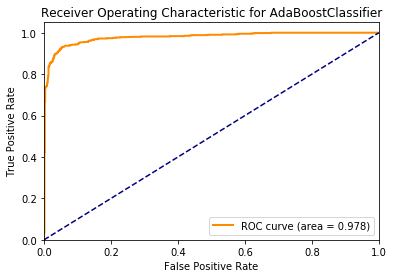

In [218]:
y_score = classifier_A.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

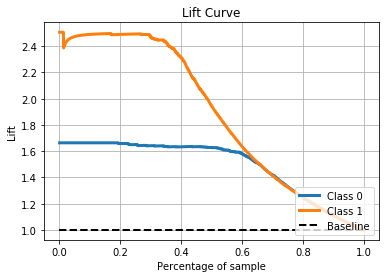

In [219]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [220]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[  0 913]
 [  0 606]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       913
           1       0.40      1.00      0.57       606

    accuracy                           0.40      1519
   macro avg       0.20      0.50      0.29      1519
weighted avg       0.16      0.40      0.23      1519

Accuracy: 0.399
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[  2 911]
 [  0 606]]

Classification Report: - 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       913
           1       0.40      1.00      0.57       606

    accuracy                           0.40      1519
   macro avg       0.70      0.50      0.29      1519
weighted avg       0.76      0.40      0.23      1519

Accuracy: 0.400
************************************************************
Confus

# Gradient Boosting

In [328]:
clf = GradientBoostingClassifier()
p_grid = {'n_estimators': list(range(10,110,10)), 'learning_rate' : [0.01,0.05,0.1,0.3,1],
          'loss' : ['deviance', 'exponential'], 'min_samples_split' : list(range(2,20,2)),
          'max_depth':list(range(2,20,2))}
grid = RandomizedSearchCV(estimator = clf, param_distributions = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'n_estimators': 80, 'min_samples_split': 4, 'max_depth': 6, 'loss': 'exponential', 'learning_rate': 0.3}
Best Score: 0.9529526281635302


## Using the best hyperparameters in building the final model.

In [329]:
classifier_G = GradientBoostingClassifier(n_estimators = finalparam['n_estimators'], loss = finalparam['loss'],
                              learning_rate = finalparam['learning_rate'],
                            min_samples_split = finalparam['min_samples_split'], max_depth = finalparam['max_depth'] )
classifier_G.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_G, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_G,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_G, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_G.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9545753785385122
**************************************************
[0.93527508 0.9579288  0.96763754 0.92556634 0.96763754 0.95469256
 0.95765472 0.93485342 0.95439739 0.96742671]
**************************************************
Mean Accuracy: 0.95 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       912
           1       0.96      0.93      0.94       607

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

**************************************************
Confusion Matrix
 [[886  26]
 [ 43 564]]
**************************************************
Matthews Corrcoef 0.9051372789245726


## ROC curve

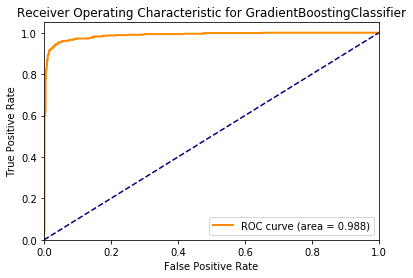

In [330]:
y_score = classifier_G.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

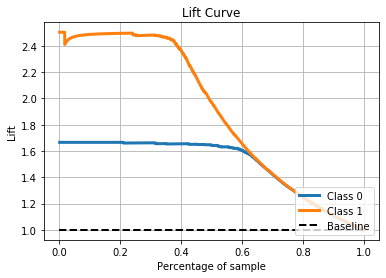

In [331]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [332]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[862  50]
 [ 25 582]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       912
           1       0.92      0.96      0.94       607

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

Accuracy: 0.951
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[874  38]
 [ 32 575]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       912
           1       0.94      0.95      0.94       607

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

Accuracy: 0.954
************************************************************
Confus

# XGBoost

In [333]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
xgb_X = X.copy()
xgb_X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<')))
                      else col for col in xgb_X.columns.values]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xgb_X, Y, test_size = 0.20)

In [334]:
clf = XGBClassifier(objective ='binary:logistic')
p_grid ={'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
Best Score: 0.9502717391304348


## Using the best hyperparameters in building the final model.

In [336]:
classifier_XG = XGBClassifier(objective ='binary:logistic', min_child_weight = finalparam['min_child_weight'],
                           gamma = finalparam['gamma'], max_depth = finalparam['max_depth'],
             subsample = finalparam['subsample'], colsample_bytree = finalparam['colsample_bytree'])
classifier_XG.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_XG.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_XG, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_XG,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_XG, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_XG.predict(X_test)))
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_XG.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_XG.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9630836047774158
**************************************************
[0.93224932 0.93224932 0.95652174 0.9701087  0.95380435 0.94836957
 0.94836957 0.9701087  0.9400545  0.95095368]
**************************************************
Mean Accuracy: 0.95 (+/- 0.03)
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.95      0.96      0.95       351

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921

**************************************************
Confusion Matrix
 [[551  19]
 [ 15 336]]
**************************************************
Matthews Corrcoef 0.9219522449383536


## ROC curve

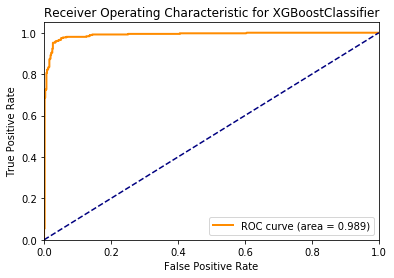

In [337]:
y_score = classifier_XG.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoostClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

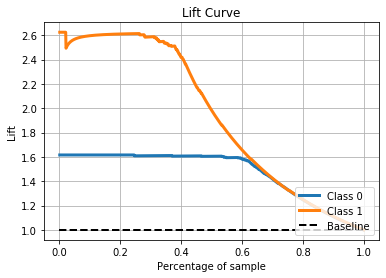

In [338]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [339]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print("Accuracy:"" %0.3f" % accuracy_score(Y_test, y_pred))
    print(60*'*')
    
    f.append(accuracy_score(Y_test, y_pred))

print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[485  85]
 [  3 348]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92       570
           1       0.80      0.99      0.89       351

    accuracy                           0.90       921
   macro avg       0.90      0.92      0.90       921
weighted avg       0.92      0.90      0.91       921

Accuracy: 0.904
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[521  49]
 [  7 344]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       570
           1       0.88      0.98      0.92       351

    accuracy                           0.94       921
   macro avg       0.93      0.95      0.94       921
weighted avg       0.94      0.94      0.94       921

Accuracy: 0.939
************************************************************
Confus

## Feature Importance

In [340]:
feature_important = []
column_names = []
for idx, col_name in enumerate(X_train.columns):
    print("The importance of feature {} is {}".format(col_name, classifier_XG.feature_importances_[idx]))
    feature_important.append(classifier_XG.feature_importances_[idx])
    column_names.append(col_name)

The importance of feature word_freq_make is 0.007142902351915836
The importance of feature word_freq_address is 0.007750592194497585
The importance of feature word_freq_all is 0.004966517444700003
The importance of feature word_freq_3d is 0.0
The importance of feature word_freq_our is 0.023065585643053055
The importance of feature word_freq_over is 0.009705215692520142
The importance of feature word_freq_remove is 0.07808302342891693
The importance of feature word_freq_internet is 0.01605748012661934
The importance of feature word_freq_order is 0.007872434332966805
The importance of feature word_freq_mail is 0.007460231892764568
The importance of feature word_freq_receive is 0.008475348353385925
The importance of feature word_freq_will is 0.008542518131434917
The importance of feature word_freq_people is 0.005447303410619497
The importance of feature word_freq_report is 0.0029158552642911673
The importance of feature word_freq_addresses is 0.006673709023743868
The importance of feature

## Visualization of the feature importance

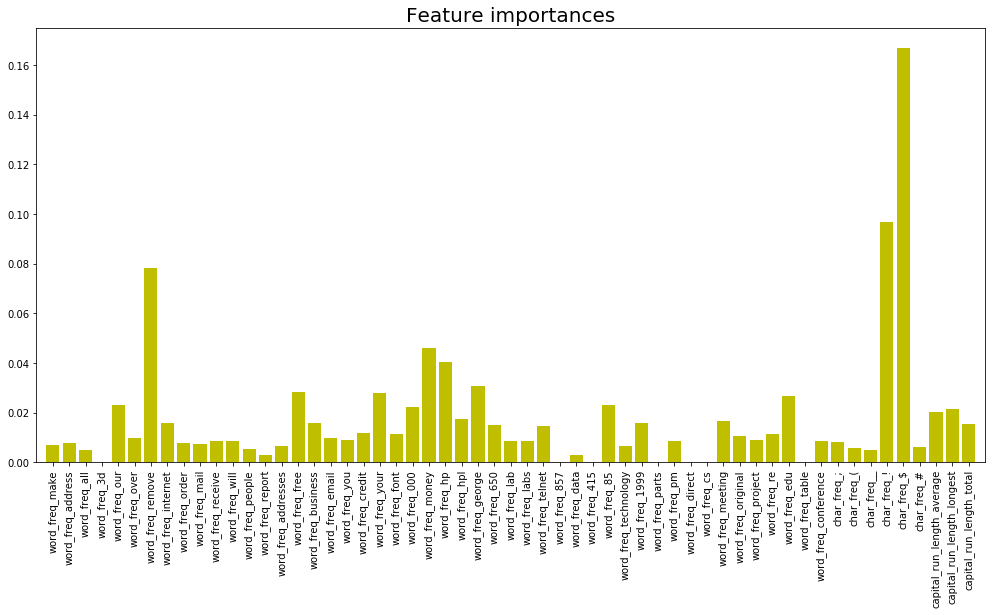

In [341]:
plt.figure(figsize=(17, 8))
plt.title("Feature importances",size=20)
plt.bar(range(X.shape[1]), feature_important,
       color='y' , align="center")
plt.xticks(range(X.shape[1]), column_names,rotation=90,fontsize = 10)
plt.xlim([-1, X.shape[1]])
plt.show()

# Neural Network

## Spilting the data for neural network analysis

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
TRAINING_SIZE = X_train.shape[0]
features = X.shape[1]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building neural network with two hidden layers

In [235]:
model = Sequential()
#First Hidden Layer
model.add(Dense(10, activation='sigmoid', input_dim = X_train_scaled.shape[1]))  
#Second Hidden Layer
model.add(Dense(10, activation='sigmoid'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='adam',loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                580       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [236]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [237]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 12us/step
Loss:  0.05024991636974332 and Accuracy: 0.9418478012084961
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 17us/step
Loss:  0.06464675527539238 and Accuracy: 0.9229098558425903


## Confusion matrix with different probability thresholds

In [238]:
f = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[461 108]
 [  9 343]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       569
           1       0.76      0.97      0.85       352

    accuracy                           0.87       921
   macro avg       0.87      0.89      0.87       921
weighted avg       0.90      0.87      0.87       921

**************************************************
Accuracy : 0.8729641693811075
**************************************************
Matthews Corrcoef 0.7626977831385835
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[504  65]
 [ 15 337]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.97  

## Visualization of accuracy for training and test data

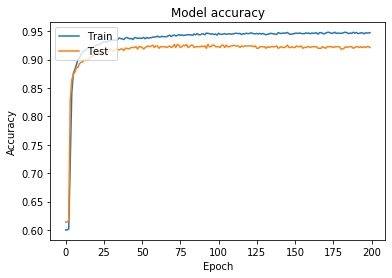

In [239]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

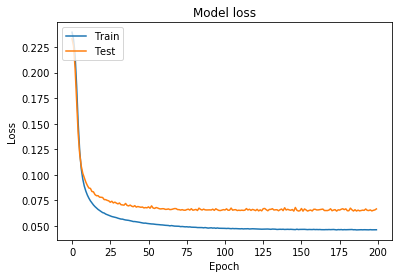

In [240]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

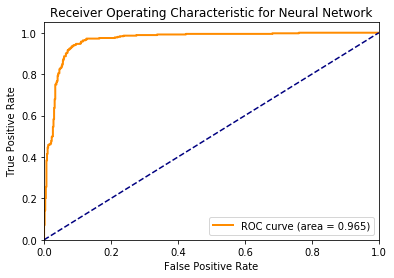

In [241]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Deep Neural Network
## Building neural network with multiple hidden layers

In [242]:
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_dim = X_train_scaled.shape[1]))  
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer ='adam',loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                1740      
_________________________________________________________________
dense_29 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [244]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [245]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 13us/step
Loss:  0.050847126984887796 and Accuracy: 0.9429348111152649
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 14us/step
Loss:  0.0649370103427305 and Accuracy: 0.9283387660980225


## Confusion matrix with different probability thresholds

In [246]:
f = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
print('Threshold for maximum accuracy score -')
print(' ')
print('The maximun accuracy score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[504  65]
 [ 16 336]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       569
           1       0.84      0.95      0.89       352

    accuracy                           0.91       921
   macro avg       0.90      0.92      0.91       921
weighted avg       0.92      0.91      0.91       921

**************************************************
Accuracy : 0.9120521172638436
**************************************************
Matthews Corrcoef 0.8235559604064463
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[514  55]
 [ 21 331]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.96  

## Visualization of accuracy for training and test data

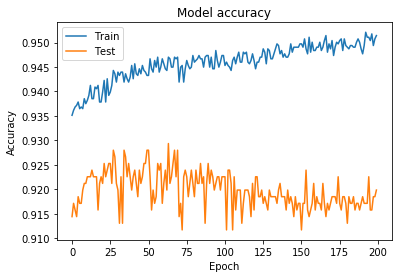

In [247]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

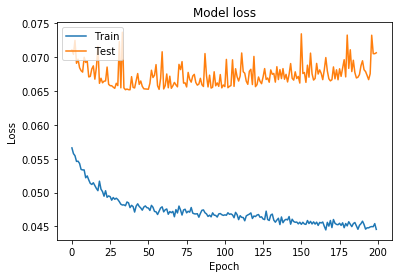

In [248]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

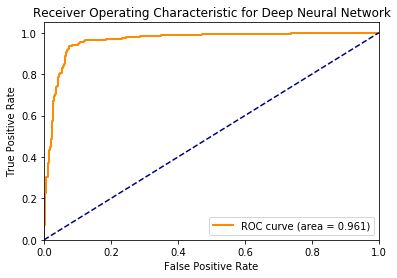

In [249]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Deep Neural Network')
plt.legend(loc="lower right")
plt.show()

# Using early stopping for the model

In [250]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5,
                          verbose=1, mode='auto')
callbacks_list = [earlystop]
model_info = model.fit(X_train_scaled, Y_train, batch_size=10,
                       epochs=200, callbacks=callbacks_list, verbose=0,
                       validation_split=0.2)

Epoch 00011: early stopping


## Evaluation of the model 

In [251]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 13us/step
Loss:  0.04858333546384845 and Accuracy: 0.945380449295044
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 13us/step
Loss:  0.06605069003554302 and Accuracy: 0.9218240976333618


## Confusion matrix with different probability thresholds

In [252]:
f = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
print('Threshold for maximum accuracy score -')
print(' ')
print('The maximun accuracy score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[514  55]
 [ 21 331]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       569
           1       0.86      0.94      0.90       352

    accuracy                           0.92       921
   macro avg       0.91      0.92      0.91       921
weighted avg       0.92      0.92      0.92       921

**************************************************
Accuracy : 0.9174809989142236
**************************************************
Matthews Corrcoef 0.8308731549668246
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[523  46]
 [ 22 330]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.96  

## Visualization of accuracy for training and test data

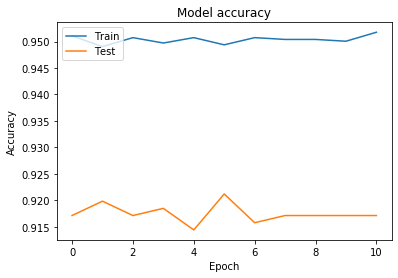

In [253]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

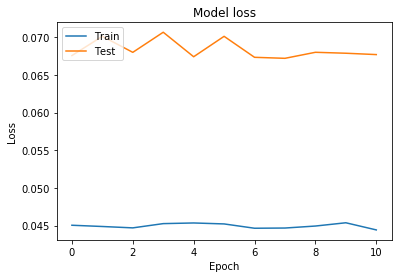

In [254]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

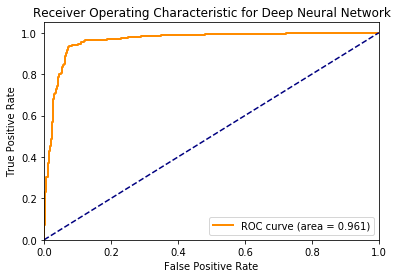

In [255]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Deep Neural Network')
plt.legend(loc="lower right")
plt.show()

# Using average misclassification cost as scoring meterics
# Importing data

In [347]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
       'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
       'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
       'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total','spam']
data2 = pd.read_csv('spambase.data', names = col_names )

# Segmenting target and predictor data

In [348]:
X = data2.drop(['spam'], axis=1)
Y = data2[['spam']]

# Defining the new scoring function for calculation misclassification cost

In [349]:
def mis_classification_cost(a,b):
    return confusion_matrix(a,b)[0,1]*10+ confusion_matrix(a,b)[1,0]
function = make_scorer(mis_classification_cost, greater_is_better=False)

# Spliting target and predictor data into training and testing 

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Decision Tree

In [263]:
clf = DecisionTreeClassifier()
p_grid = {"max_depth": list(range(1,30)), "criterion" : ['entropy','gini'], 'min_samples_leaf' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}
Best Score: -96.78131083711875


## Using the best hyperparameters in building the final model.

In [264]:
classifier_d = DecisionTreeClassifier(criterion = finalparam['criterion'], max_depth = finalparam['max_depth'],
                                      min_samples_leaf = finalparam['min_samples_leaf'])
classifier_d.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy:", accuracy_score(Y_test, classifier_d.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_d, X_train, Y_train, cv=10, scoring=function))
print('*' * 50)
print( "Misclassification cost:" "%0.2f (+/- %0.2f)" % (cross_val_score(classifier_d, X_train,
                                                                                   Y_train,cv=10,
                                                                                   scoring = function).mean(),
                                       cross_val_score(classifier_d, X_train, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_d.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_d.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print( 'Confusion Matrix\n', confusion_matrix(Y_test, classifier_d.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_d.predict(X_test)))

GOODNESS OF MODEL
Accuracy: 0.9071757735352205
**************************************************
[ -75  -73  -83 -107  -99 -104  -91 -122 -137  -75]
**************************************************
Misclassification cost:-97.20 (+/- 36.53)
**************************************************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       902
           1       0.93      0.83      0.88       617

    accuracy                           0.91      1519
   macro avg       0.91      0.90      0.90      1519
weighted avg       0.91      0.91      0.91      1519

Total Cost : 483
**************************************************
Confusion Matrix
 [[864  38]
 [103 514]]
**************************************************
Matthews Corrcoef 0.8076136537469908


## ROC curve

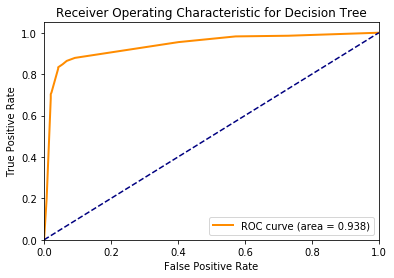

In [265]:
y_score = classifier_d.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Lift curve

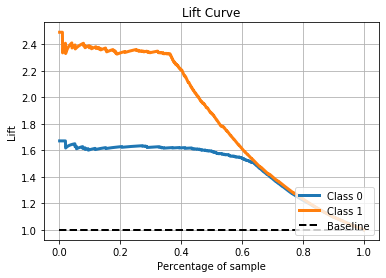

In [66]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [266]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy -')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[819  83]
 [ 75 542]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       902
           1       0.87      0.88      0.87       617

    accuracy                           0.90      1519
   macro avg       0.89      0.89      0.89      1519
weighted avg       0.90      0.90      0.90      1519

Total Cost : 905
**************************************************
Accuracy : 0.8959842001316656
**************************************************
Matthews Corrcoef 0.7848653149368243
Confusion Matrix with threshold 0.2 : - 
 [[819  83]
 [ 75 542]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       902
           1       0.87      0.88      0.87       617

    accuracy                           0.90      1519
   macro avg       0.89      0.89      0.89      1519
weighted avg       0.90      

# Scaling the data using MinMaxScaler

In [269]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 

In [280]:
clf = KNeighborsClassifier()
p_grid = {'weights':["uniform", "distance"], 'n_neighbors' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring=function)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'n_neighbors': 2, 'weights': 'uniform'}
Best Score: -102.80921479558728


## Using the best hyperparameters in building the final model.

In [281]:
classifier_k = KNeighborsClassifier(n_neighbors= finalparam['n_neighbors'], weights= finalparam['weights'])
classifier_k.fit(X_train_scaled, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_k, X_train_scaled, Y_train, cv=10, scoring= function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_k, X_train_scaled,
                                                                                    Y_train,
                                                       cv=10, scoring=function).mean(),
                                       cross_val_score(classifier_k, X_train_scaled, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_k.predict(X_test_scaled)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_k.predict(X_test_scaled)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_k.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.8828176431863067
**************************************************
[-131 -111 -116  -96  -84  -93  -63 -112 -132  -90]
**************************************************
Misclassification cost: -102.80 (+/- 41.07)
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       902
           1       0.94      0.76      0.84       617

    accuracy                           0.88      1519
   macro avg       0.90      0.86      0.87      1519
weighted avg       0.89      0.88      0.88      1519

Total Cost : 457
**************************************************
Confusion Matrix
 [[871  31]
 [147 470]]
**************************************************
Matthews Corrcoef 0.7598289703671413


## ROC curve

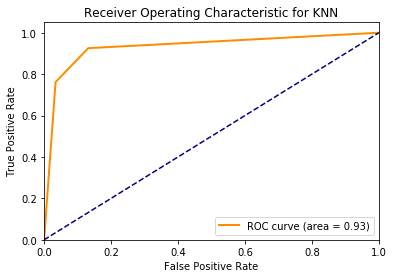

In [282]:
y_score = classifier_k.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

## Lift curve

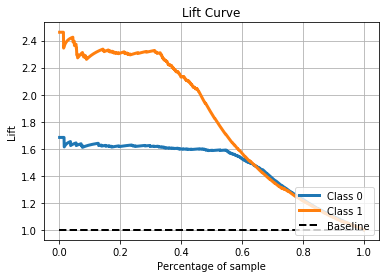

In [283]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [284]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy -')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[783 119]
 [ 46 571]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       902
           1       0.83      0.93      0.87       617

    accuracy                           0.89      1519
   macro avg       0.89      0.90      0.89      1519
weighted avg       0.90      0.89      0.89      1519

Total Cost : 1236
**************************************************
Accuracy : 0.89137590520079
**************************************************
Matthews Corrcoef 0.7827085692076008
Confusion Matrix with threshold 0.2 : - 
 [[783 119]
 [ 46 571]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       902
           1       0.83      0.93      0.87       617

    accuracy                           0.89      1519
   macro avg       0.89      0.90      0.89      1519
weighted avg       0.90      0

# Logistic Regresion

In [285]:
clf = LogisticRegression()
p_grid = {'penalty':["l1", "l2"], 'C' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring=function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'C': 22, 'penalty': 'l2'}
Best Score: -106.70506164828033


## Using the best hyperparameters in building the final model.

In [286]:
classifier_l = LogisticRegression(C= finalparam['C'], penalty = finalparam['penalty'])
classifier_l.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_l.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_l, X_train, Y_train, cv=10, scoring=function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_l,
                                                                                   X_train, Y_train, cv=10,
                                                       scoring=function).mean(),
                                       cross_val_score(classifier_l, X_train, Y_train, cv=10,
                                                       scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_l.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_l.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_l.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_l.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.924292297564187
**************************************************
[ -82 -144 -142 -105 -115  -60  -74 -151 -120  -74]
**************************************************
Misclassification cost: -106.70 (+/- 62.54)
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       902
           1       0.93      0.88      0.90       617

    accuracy                           0.92      1519
   macro avg       0.93      0.92      0.92      1519
weighted avg       0.92      0.92      0.92      1519

Total Cost : 466
**************************************************
Confusion Matrix
 [[863  39]
 [ 76 541]]
**************************************************
Matthews Corrcoef 0.842654444742462


## ROC curve

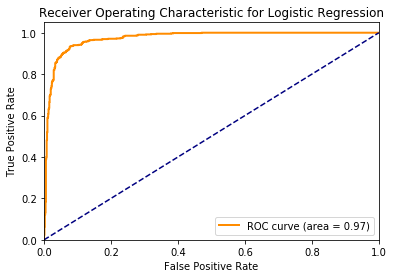

In [287]:
y_score = classifier_l.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Lift curve

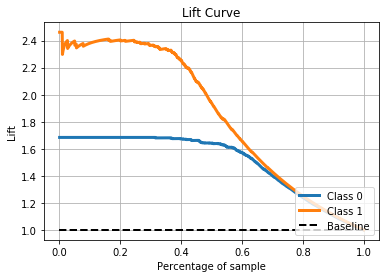

In [288]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [289]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy -')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[645 257]
 [  6 611]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       902
           1       0.70      0.99      0.82       617

    accuracy                           0.83      1519
   macro avg       0.85      0.85      0.83      1519
weighted avg       0.87      0.83      0.83      1519

Total Cost : 2576
**************************************************
Accuracy : 0.8268597761685319
**************************************************
Matthews Corrcoef 0.7000065327496984
Confusion Matrix with threshold 0.2 : - 
 [[778 124]
 [ 23 594]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       902
           1       0.83      0.96      0.89       617

    accuracy                           0.90      1519
   macro avg       0.90      0.91      0.90      1519
weighted avg       0.91     

# SVC

In [290]:
clf = SVC(probability = True)
p_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid' ], 'C' : [0.001,0.1,1,10,100],
          'degree': list(range(3,8)), 'gamma': ['auto', 'scale']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring=function)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: -90.4185593770279


## Using the best hyperparameters in building the final model.

In [291]:
classifier_S = SVC(kernel= finalparam['kernel'], C = finalparam['C'], degree = finalparam['degree'],
                   gamma = finalparam['gamma'], probability = True)
classifier_S.fit(X_train_scaled, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_S, X_train_scaled, Y_train, cv=10, scoring=function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_S,
                                                                                   X_train_scaled, Y_train,
                                                       cv=10, scoring=function).mean(),
                                       cross_val_score(classifier_S, X_train_scaled, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_S.predict(X_test_scaled)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_S.predict(X_test_scaled)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_S.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9256089532587228
**************************************************
[ -74 -115 -122 -101  -97  -62  -55 -132  -99  -47]
**************************************************
Misclassification cost: -90.40 (+/- 55.77)
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       902
           1       0.94      0.87      0.90       617

    accuracy                           0.93      1519
   macro avg       0.93      0.92      0.92      1519
weighted avg       0.93      0.93      0.93      1519

Total Cost : 419
**************************************************
Confusion Matrix
 [[868  34]
 [ 79 538]]
**************************************************
Matthews Corrcoef 0.8456252809412869


## ROC curve

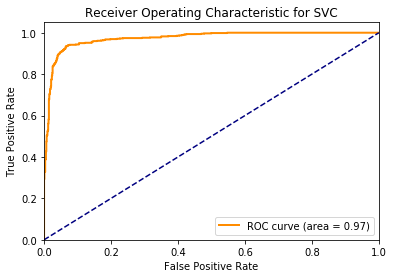

In [292]:
y_score = classifier_S.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVC')
plt.legend(loc="lower right")
plt.show()

## Lift curve

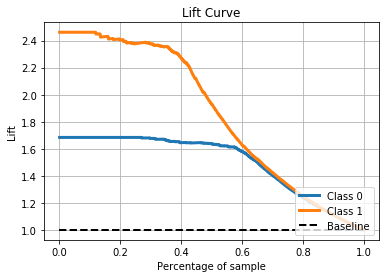

In [293]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [294]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[716 186]
 [ 19 598]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       902
           1       0.76      0.97      0.85       617

    accuracy                           0.87      1519
   macro avg       0.87      0.88      0.86      1519
weighted avg       0.89      0.87      0.87      1519

Total Cost : 1879
**************************************************
Accuracy : 0.8650427913100724
**************************************************
Matthews Corrcoef 0.7498375984078657
Confusion Matrix with threshold 0.2 : - 
 [[816  86]
 [ 35 582]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       902
           1       0.87      0.94      0.91       617

    accuracy                           0.92      1519
   macro avg       0.92      0.92      0.92      1519
weighted avg       0.92     

# Naive Bayes

In [295]:
classifier_G = GaussianNB(priors=None, var_smoothing=1e-09)
classifier_G.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_G, X_train, Y_train, cv=10, scoring = function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_G,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring = function).mean(),
                                       cross_val_score(classifier_G, X_train, Y_train,
                                                       cv=10, scoring = function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_G.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_G.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_G.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.826201448321264
**************************************************
[-535 -579 -494 -473 -597 -502 -524 -543 -649 -438]
**************************************************
Misclassification cost: -533.40 (+/- 118.25)
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.74      0.83       902
           1       0.71      0.95      0.82       617

    accuracy                           0.83      1519
   macro avg       0.84      0.85      0.83      1519
weighted avg       0.86      0.83      0.83      1519

Total Cost : 2379
**************************************************
Confusion Matrix
 [[667 235]
 [ 29 588]]
**************************************************
Matthews Corrcoef 0.6825585499215105


## ROC curve

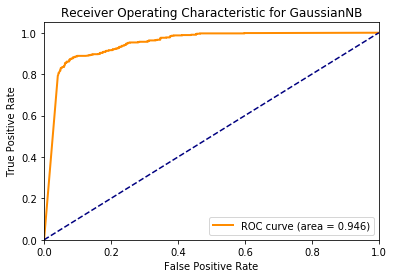

In [296]:
y_score =classifier_G.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GaussianNB')
plt.legend(loc="lower right")
plt.show()

## Lift curve

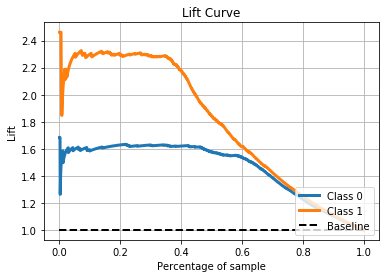

In [297]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [298]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[666 236]
 [ 29 588]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.74      0.83       902
           1       0.71      0.95      0.82       617

    accuracy                           0.83      1519
   macro avg       0.84      0.85      0.83      1519
weighted avg       0.86      0.83      0.83      1519

Total Cost : 2389
**************************************************
Accuracy : 0.825543120473996
**************************************************
Matthews Corrcoef 0.6815419179197759
Confusion Matrix with threshold 0.2 : - 
 [[667 235]
 [ 29 588]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.74      0.83       902
           1       0.71      0.95      0.82       617

    accuracy                           0.83      1519
   macro avg       0.84      0.85      0.83      1519
weighted avg       0.86      

# Random Forest 

In [299]:
clf_R = RandomForestClassifier()
p_grid = {"max_depth": [None],
              'n_estimators':list(range(10,100,10)),
              "max_features": ['auto', 'log2', None],
              "min_samples_split": [2,6,10],
              "min_samples_leaf": [1,2,4],
              "bootstrap": [True, False]}
grid = GridSearchCV(estimator = clf_R, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80}
Best Score: -58.97793640493186


## Using the best hyperparameters in building the final model.

In [300]:
classifier_R = RandomForestClassifier(bootstrap = finalparam['bootstrap'], max_depth = finalparam['max_depth'],
                               max_features = finalparam['max_features'],
                               min_samples_leaf = finalparam['min_samples_leaf'],
                               min_samples_split = finalparam['min_samples_split'],
                               n_estimators = finalparam['n_estimators'])
classifier_R.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_R.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_R, X_train, Y_train, cv=10, scoring=function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_R,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring=function).mean(),
                                       cross_val_score(classifier_R, X_train, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_R.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_R.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_R.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_R.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9526003949967083
**************************************************
[ -62  -40  -78 -100  -41  -49  -50  -75 -115  -62]
**************************************************
Misclassification cost: -66.60 (+/- 54.00)
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.95      0.93      0.94       617

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

Total Cost : 315
**************************************************
Confusion Matrix
 [[875  27]
 [ 45 572]]
**************************************************
Matthews Corrcoef 0.9015614702006416


## ROC curve

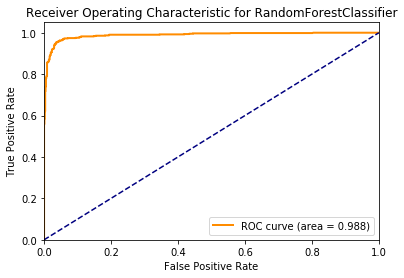

In [301]:
y_score = classifier_R.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

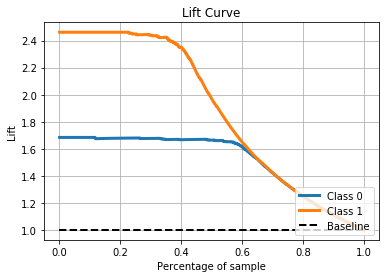

In [302]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [303]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[666 236]
 [  6 611]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       902
           1       0.72      0.99      0.83       617

    accuracy                           0.84      1519
   macro avg       0.86      0.86      0.84      1519
weighted avg       0.88      0.84      0.84      1519

Total Cost : 2366
**************************************************
Accuracy : 0.8406846609611587
**************************************************
Matthews Corrcoef 0.7204923534583282
Confusion Matrix with threshold 0.2 : - 
 [[785 117]
 [ 11 606]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92       902
           1       0.84      0.98      0.90       617

    accuracy                           0.92      1519
   macro avg       0.91      0.93      0.91      1519
weighted avg       0.93     

## Feature Importance

In [304]:
feature_important = []
column_names = []
for idx, col_name in enumerate(X_train.columns):
    print("The importance of feature {} is {}".format(col_name, classifier_R.feature_importances_[idx]))
    feature_important.append(classifier_R.feature_importances_[idx])
    column_names.append(col_name)

The importance of feature word_freq_make is 0.0036012074090638504
The importance of feature word_freq_address is 0.007288827887141749
The importance of feature word_freq_all is 0.009807794198645225
The importance of feature word_freq_3d is 0.00048132109698955267
The importance of feature word_freq_our is 0.027900861997798107
The importance of feature word_freq_over is 0.009533437664757442
The importance of feature word_freq_remove is 0.06907290580862578
The importance of feature word_freq_internet is 0.014571752666037606
The importance of feature word_freq_order is 0.0031678275657130574
The importance of feature word_freq_mail is 0.008667108232855372
The importance of feature word_freq_receive is 0.014004671497698414
The importance of feature word_freq_will is 0.011260997389285612
The importance of feature word_freq_people is 0.002830667312353062
The importance of feature word_freq_report is 0.00232903850817963
The importance of feature word_freq_addresses is 0.0037945421713053216
The 

## Visualization of feature importance

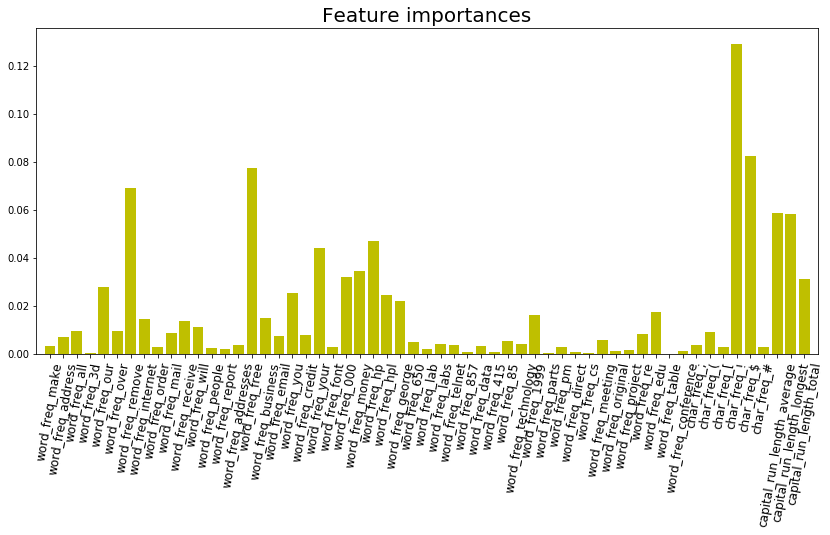

In [305]:
plt.figure(figsize=(14, 6))
plt.title("Feature importances",size=20)
plt.bar(range(X.shape[1]), feature_important,
       color='y' , align="center")
plt.xticks(range(X.shape[1]), column_names,rotation=80,fontsize = 12)
plt.xlim([-1, X.shape[1]])
plt.show()

# Ada Boosting

In [306]:
clf = AdaBoostClassifier()
p_grid = { 'n_estimators': list(range(10,110,10)), 'learning_rate' : [0.01,0.05,0.1,0.3,1],
          'algorithm' : ['SAMME', 'SAMME.R']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 50}
Best Score: -78.19987021414666


## Using the best hyperparameters in building the final model.

In [307]:
classifier_A = AdaBoostClassifier(n_estimators = finalparam['n_estimators'], algorithm = finalparam['algorithm'],
                              learning_rate = finalparam['learning_rate'])
classifier_A.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_A.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_A, X_train, Y_train, cv=10, scoring=function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_A,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring=function).mean(),
                                       cross_val_score(classifier_A, X_train, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_A.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_A.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_A.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_A.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.89137590520079
**************************************************
[ -70  -65  -80  -69  -75 -110  -79  -45 -114  -75]
**************************************************
Misclassification cost: -78.20 (+/- 38.71)
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       902
           1       0.94      0.78      0.85       617

    accuracy                           0.89      1519
   macro avg       0.90      0.87      0.88      1519
weighted avg       0.90      0.89      0.89      1519

Total Cost : 435
**************************************************
Confusion Matrix
 [[872  30]
 [135 482]]
**************************************************
Matthews Corrcoef 0.7770748501437422


## ROC curve

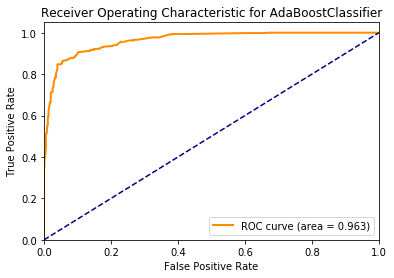

In [308]:
y_score = classifier_A.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

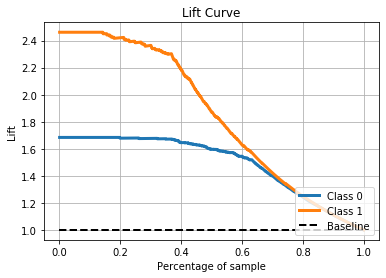

In [309]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [310]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[  0 902]
 [  0 617]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       902
           1       0.41      1.00      0.58       617

    accuracy                           0.41      1519
   macro avg       0.20      0.50      0.29      1519
weighted avg       0.16      0.41      0.23      1519

Total Cost : 9020
**************************************************
Accuracy : 0.40618828176431865
**************************************************
Matthews Corrcoef 0.0
Confusion Matrix with threshold 0.2 : - 
 [[  0 902]
 [  0 617]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       902
           1       0.41      1.00      0.58       617

    accuracy                           0.41      1519
   macro avg       0.20      0.50      0.29      1519
weighted avg       0.16      0.41      0.2

# Gradient Boosting

In [311]:
clf = GradientBoostingClassifier()
p_grid = {'n_estimators': list(range(10,110,10)), 'learning_rate' : [0.01,0.05,0.1,0.3,1],
          'loss' : ['deviance', 'exponential'], 'min_samples_split' : list(range(2,20,2)),
          'max_depth':list(range(2,20,2))}
grid = RandomizedSearchCV(estimator = clf, param_distributions = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'n_estimators': 70, 'min_samples_split': 6, 'max_depth': 16, 'loss': 'exponential', 'learning_rate': 0.3}
Best Score: -72.69792342634653


## Using the best hyperparameters in building the final model.

In [312]:
classifier_G = GradientBoostingClassifier(n_estimators = finalparam['n_estimators'], loss = finalparam['loss'],
                              learning_rate = finalparam['learning_rate'],
                            min_samples_split = finalparam['min_samples_split'], max_depth = finalparam['max_depth'] )
classifier_G.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_G, X_train, Y_train, cv=10, scoring=function))
print('*' * 50)
print("Misclassification cost:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_G,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring=function).mean(),
                                       cross_val_score(classifier_G, X_train, Y_train,
                                                       cv=10, scoring=function).std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_G.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_G.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_G.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_G.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9519420671494404
**************************************************
[ -52  -52  -86 -112  -50  -66  -60  -95 -115  -39]
**************************************************
Misclassification cost: -82.20 (+/- 54.49)
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       902
           1       0.95      0.93      0.94       617

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

Total Cost : 334
**************************************************
Confusion Matrix
 [[873  29]
 [ 44 573]]
**************************************************
Matthews Corrcoef 0.9001831387615667


## ROC curve

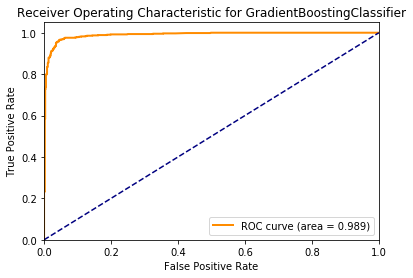

In [313]:
y_score = classifier_G.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

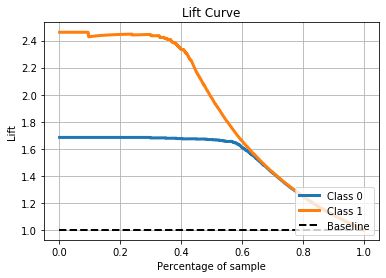

In [314]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [315]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[870  32]
 [ 38 579]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       902
           1       0.95      0.94      0.94       617

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519

Total Cost : 358
**************************************************
Accuracy : 0.9539170506912442
**************************************************
Matthews Corrcoef 0.9043546698330422
Confusion Matrix with threshold 0.2 : - 
 [[871  31]
 [ 40 577]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       902
           1       0.95      0.94      0.94       617

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      

# XGBoost

In [317]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
xgb_X = X.copy()
xgb_X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<')))
                      else col for col in xgb_X.columns.values]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xgb_X, Y, test_size = 0.20)

In [319]:
clf = XGBClassifier(objective ='binary:logistic')
p_grid ={'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = function)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
Best Score: -83.39945652173913


## Using the best hyperparameters in building the final model.

In [320]:
classifier_XG = XGBClassifier(objective ='binary:logistic', min_child_weight = finalparam['min_child_weight'],
                           gamma = finalparam['gamma'], max_depth = finalparam['max_depth'],
             subsample = finalparam['subsample'], colsample_bytree = finalparam['colsample_bytree'])
classifier_XG.fit(X_train, Y_train)
print("GOODNESS OF MODEL")
print("Accuracy :", accuracy_score(Y_test, classifier_XG.predict(X_test)))
print('*' * 50)
print(cross_val_score(classifier_XG, X_train, Y_train, cv=10, scoring='accuracy'))
print('*' * 50)
print("Mean Accuracy:"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_XG,
                                                                                   X_train, Y_train,
                                                       cv=10, scoring='accuracy').mean(),
                                       cross_val_score(classifier_XG, X_train, Y_train,
                                                       cv=10, scoring='accuracy').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_XG.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(Y_test, classifier_G.predict(X_test)).ravel()
print('Total Cost :', 10*fp + 1*fn)
print('*' * 50)
print('Confusion Matrix\n', confusion_matrix(Y_test, classifier_XG.predict(X_test)))
print('*' * 50)
print('Matthews Corrcoef', matthews_corrcoef(Y_test, classifier_XG.predict(X_test)))

GOODNESS OF MODEL
Accuracy : 0.9543973941368078
**************************************************
[0.93495935 0.95392954 0.9673913  0.94021739 0.94565217 0.96467391
 0.94836957 0.93206522 0.95912807 0.94822888]
**************************************************
Mean Accuracy: 0.95 (+/- 0.02)
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       550
           1       0.96      0.93      0.94       371

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921

Total Cost : 89
**************************************************
Confusion Matrix
 [[534  16]
 [ 26 345]]
**************************************************
Matthews Corrcoef 0.9050293673526038


## ROC curve

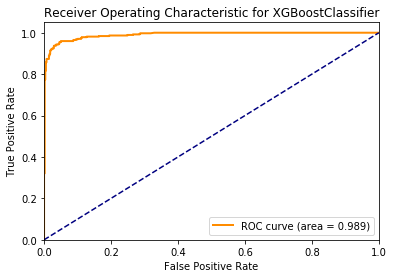

In [321]:
y_score = classifier_XG.predict_proba(X_test)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoostClassifier')
plt.legend(loc="lower right")
plt.show()

## Lift curve

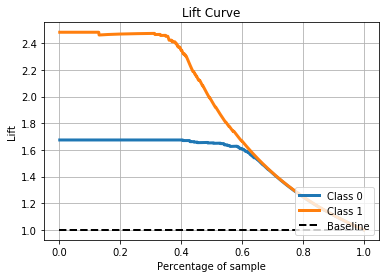

In [322]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds

In [323]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print()
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy-')
print(' ')
print('The maximun accuracy is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

Confusion Matrix with threshold 0.1 : - 
 [[466  84]
 [  7 364]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       550
           1       0.81      0.98      0.89       371

    accuracy                           0.90       921
   macro avg       0.90      0.91      0.90       921
weighted avg       0.92      0.90      0.90       921

Total Cost : 847
**************************************************
Accuracy : 0.9011943539630836
**************************************************
Matthews Corrcoef 0.8129078740564472
Confusion Matrix with threshold 0.2 : - 
 [[495  55]
 [ 12 359]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       550
           1       0.87      0.97      0.91       371

    accuracy                           0.93       921
   macro avg       0.92      0.93      0.93       921
weighted avg       0.93      

# Neural Network

## Spilting the data for neural network analysis

In [351]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
TRAINING_SIZE = X_train.shape[0]
features = X.shape[1]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building neural network with two hidden layers

In [352]:
model = Sequential()
#First Hidden Layer
model.add(Dense(10, activation='sigmoid', input_dim = X_train_scaled.shape[1]))  
#Second Hidden Layer
model.add(Dense(10, activation='sigmoid'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='adam',loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                580       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [353]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [354]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 12us/step
Loss:  0.04752776293316856 and Accuracy: 0.9413043260574341
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 14us/step
Loss:  0.05725971954782674 and Accuracy: 0.9305103421211243


## Confusion matrix with different probability thresholds

In [355]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy score -')
print(' ')
print('The maximun accuracy score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[448  90]
 [ 15 368]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       538
           1       0.80      0.96      0.88       383

    accuracy                           0.89       921
   macro avg       0.89      0.90      0.89       921
weighted avg       0.90      0.89      0.89       921

Total Cost : 915
**************************************************
Accuracy : 0.8859934853420195
**************************************************
Matthews Corrcoef 0.7822420955810272
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[484  54]
 [ 22 361]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

        

## Visualization of accuracy for training and test data

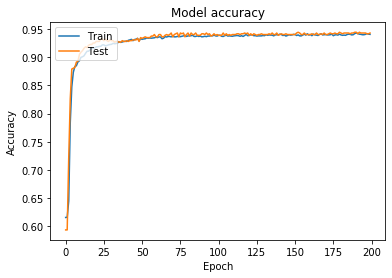

In [356]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

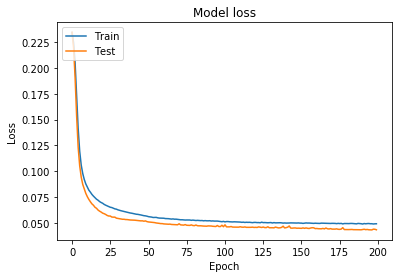

In [357]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

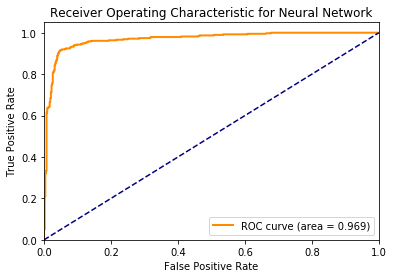

In [358]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Deep Neural Network
## Building neural network with multiple hidden layers

In [359]:
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_dim = X_train_scaled.shape[1]))  
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer ='adam',loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 30)                1740      
_________________________________________________________________
dense_37 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_38 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [360]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [361]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 12us/step
Loss:  0.04807806057329087 and Accuracy: 0.9421195387840271
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 13us/step
Loss:  0.058480717589619625 and Accuracy: 0.9305103421211243


## Confusion matrix with different probability thresholds

In [362]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy score -')
print(' ')
print('The maximun accuracy score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[480  58]
 [ 22 361]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       538
           1       0.86      0.94      0.90       383

    accuracy                           0.91       921
   macro avg       0.91      0.92      0.91       921
weighted avg       0.92      0.91      0.91       921

Total Cost : 602
**************************************************
Accuracy : 0.9131378935939196
**************************************************
Matthews Corrcoef 0.8262075357057985
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[496  42]
 [ 26 357]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

        

## Visualization of accuracy for training and test data

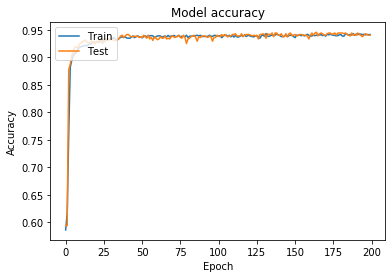

In [363]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

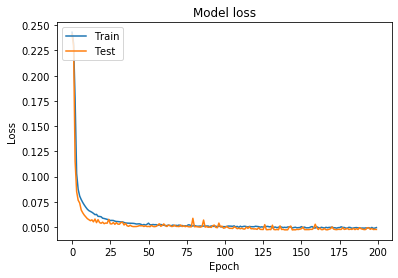

In [364]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

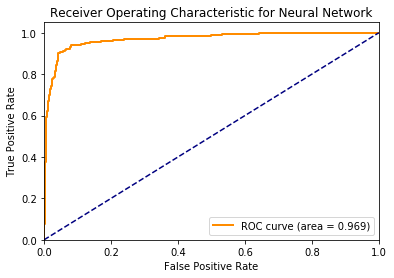

In [365]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Using early stopping for the model

In [366]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5,
                          verbose=1, mode='auto')
callbacks_list = [earlystop]
model_info = model.fit(X_train_scaled, Y_train, batch_size=10,
                       epochs=200, callbacks=callbacks_list, verbose=0,
                       validation_split=0.2)

Epoch 00008: early stopping


## Evaluation of the model

In [367]:
print("Loss and Accuracy on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'Accuracy:',eval_model[1])
print('*' * 50)
print("Loss and Accuracy on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'Accuracy:',result[1])

Loss and Accuracy on Training Data
3680/3680 [==============================] - 0s 13us/step
Loss:  0.04931400988817863 and Accuracy: 0.9413043260574341
**************************************************
Loss and Accuracy on Test Data
921/921 [==============================] - 0s 14us/step
Loss:  0.06022348803802759 and Accuracy: 0.9229098558425903


## Confusion matrix with different probability thresholds

In [368]:
f = []
total_cost = []
for i in range(1,11,1):
    y_pred=model.predict(X_test_scaled)
    y_pred =(y_pred>(i/10))
    print("GOODNESS OF MODEL")
    print('*' * 50)
    print("Confusion Matrix with threshold",i/10,": - \n",confusion_matrix(Y_test, y_pred))
    print('*' * 50)
    print("Classification Report: - \n",classification_report(Y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print('Total Cost :', 10*fp + 1*fn)
    print('*' * 50)
    print("Accuracy :", accuracy_score(Y_test, y_pred))
    print('*' * 50)
    print('Matthews Corrcoef', matthews_corrcoef(Y_test, y_pred))
    f.append(accuracy_score(Y_test, y_pred))
    total_cost.append(10*fp + 1*fn)
    
print('Threshold for maximum accuracy score -')
print(' ')
print('The maximun accuracy score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)
print('The average cost for model is', sum(total_cost)/10)

GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.1 : - 
 [[442  96]
 [ 16 367]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       538
           1       0.79      0.96      0.87       383

    accuracy                           0.88       921
   macro avg       0.88      0.89      0.88       921
weighted avg       0.89      0.88      0.88       921

Total Cost : 976
**************************************************
Accuracy : 0.8783930510314875
**************************************************
Matthews Corrcoef 0.7686748256037299
GOODNESS OF MODEL
**************************************************
Confusion Matrix with threshold 0.2 : - 
 [[480  58]
 [ 22 361]]
**************************************************
Classification Report: - 
               precision    recall  f1-score   support

        

## Visualization of accuracy for training and test data

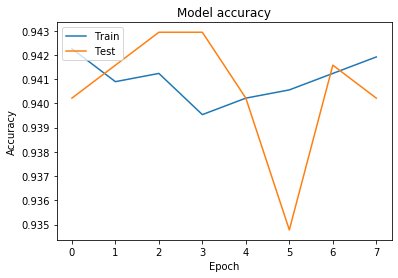

In [369]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualization of loss for training and test data

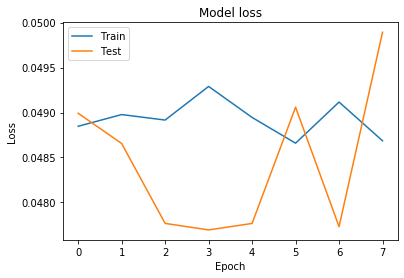

In [370]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ROC curve

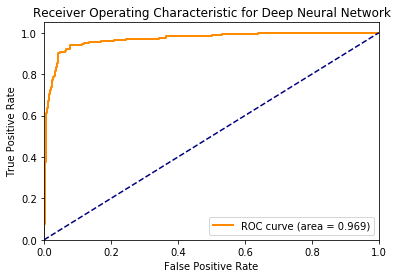

In [371]:
y_score = model.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test,(y_score))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Deep Neural Network')
plt.legend(loc="lower right")
plt.show()

# Model evaluation of spambase data 

In [388]:
print('Accuracy metrics based models')
df2 = pd.DataFrame({"Accuracy":[0.92,0.90,0.91,0.92,0.82,0.96,0.94,0.95,0.96,0.92,0.92],
                    "Mean Accuracy":[0.92,0.91,0.93,0.93,0.82,0.95,0.95,0.95,0.95,0.92,0.92],
                    "ROC(Auc)":[0.90,0.95,0.97,0.97,0.94,0.99,0.98,0.99,0.99,0.97,0.96],
                    "MCC":[0.83,0.79,0.82,0.83,0.67,0.91,0.87,0.90,0.92,0.87,0.83]})
df2.index = ['Decision Tree', 'KNN', 'Logistice Regression', 'SVC', 'Naive Bayes', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'XGBoost','Neural Network', 'Deep Neural Network']
df2


Accuracy metrics based models


,Accuracy,Mean Accuracy,ROC(Auc),MCC
Decision Tree,0.92,0.92,0.90,0.83
KNN,0.90,0.91,0.95,0.79
Logistice Regression,0.91,0.93,0.97,0.82
SVC,0.92,0.93,0.97,0.83
Naive Bayes,0.82,0.82,0.94,0.67
Random Forest,0.96,0.95,0.99,0.91
Ada Boosting,0.94,0.95,0.98,0.87
Gradient Boosting,0.95,0.95,0.99,0.90
XGBoost,0.96,0.95,0.99,0.92
Neural Network,0.92,0.92,0.97,0.87



# Evaluation of Models based on Accuracy metrics
### Hyperparameter tuning 
For all models I have used GridsearchCV to find the optimum hyperparameters. Finals I have used these hyperparameters in building the final models. I have also used cross validation to measure the mean performance for all models.

### Normalization
For KNN and SVC I have used normalized data using MinMaxScaler. For all other models I have used non-scaled data. I followed the best practice of normalizing data for the models which required scaled data.
 
### Feature Selection
I have used feature selection for random forest and XGBoost and also plotted the graph for the same. The feature importance can be seen from the graph. 

### Best practices 
I have used mutliple performance measures like precision, recall, mean accuracy, f1-score. I have also build confusion matrix for thresholds ranging from 0.1 to 1 on a increment of 0.1 for every model. Extensive care has been taken while building all models like cross validation, various performace measurements, hyperparameter tuning. I have also used techinque like early stopping in building neural networks

### Best Model 
The above table shows the extensive comparision of many performance measure for all models. The best model came out to be XGBoost giving the maximum accuracy, mean accuracy, ROC(auc) and MCC.



In [389]:
print('Misclassification cost metrics based models')
df3 = pd.DataFrame({"Accuracy":[0.90,0.88,0.92,0.92,0.83,0.95,0.89,0.95,0.95,0.93,0.93],
                    "Misclassification cost":[483,457,466,419,2379,315,435,334,89,370,325],
                    "ROC(Auc)":[0.94,0.93,0.97,0.97,0.95,0.99,0.96,0.99,0.99,0.97,0.97]})
df3.index = ['Decision Tree', 'KNN', 'Logistice Regression', 'SVC', 'Naive Bayes', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'XGBoost','Neural Network', 'Deep Neural Network']
df3

Misclassification cost metrics based models


,Accuracy,Misclassification cost,ROC(Auc)
Decision Tree,0.90,483,0.94
KNN,0.88,457,0.93
Logistice Regression,0.92,466,0.97
SVC,0.92,419,0.97
Naive Bayes,0.83,2379,0.95
Random Forest,0.95,315,0.99
Ada Boosting,0.89,435,0.96
Gradient Boosting,0.95,334,0.99
XGBoost,0.95,89,0.99
Neural Network,0.93,370,0.97


# Model evaluation for models based on misclassification cost metrics
Same best practices were followed as for building models based on accuracy metric. 
The models were build based on misclassification cost. This was done by defining the customized scoring metrics (10 * False positve + 1 * False Negatives)
## Best model
The above table shows the extensive comparision of all models. Based on the evaluation XGBoost cost came out to be minimum. The best model for misclassification cost metrics also had higher accuracy and ROC(auc).